In [13]:
import csv
import pandas as pd
import os, glob

def read_all_outputs():
    headers  = ['size_input_Go', 'type_implemantation', 'nb_workers', 'type_machine', 'time', 'iterations']
    all_output = {h:[] for h in headers}
    page_ranks = {'id':[], 'urlid':[], 'rank':[]}

    with open(os.path.join('..', 'outputs', 'output_results.csv'), newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        print("Field names of output_results.csv", reader.fieldnames)
        for row in reader:
            time_file = os.path.join('..', 'outputs', 'wikilinks', row['time_output'])
            page_rank_file = os.path.join('..', 'outputs', 'wikilinks', row['pagerank_output'])

            if os.path.exists(time_file) and os.path.exists(page_rank_file):
                # Read the stats csv
                all_output['nb_workers'].append(int(row['nb_workers']))
                all_output['size_input_Go'].append(float(row['size_input_Go']))
                all_output['type_implemantation'].append(row['type_implemantation'])
                all_output['type_machine'].append(row['type_machine'])
            

                
                # Read time
                with open(time_file, 'r', encoding='utf-8') as timefile:
                    time_reader = csv.DictReader(timefile)
                    for time_row in time_reader:
                        all_output['time'].append(float(time_row['time']))
                        all_output['iterations'].append(int(time_row['iterations']))

                # Read outputs
                with open(glob.glob(os.path.join(page_rank_file, '*.csv'))[0], 'r', encoding='utf-8') as prfile:
                        prfile.readline()
                        
                        for _ in range(1):
                            pr = prfile.readline().strip('\n').split(',')
                            page_ranks['id'].append(len(all_output['nb_workers'])-1)
                            page_ranks['urlid'].append(pr[0])
                            page_ranks['rank'].append(float(pr[1]))
            else:
                if not os.path.exists(time_file):
                    print("Time file is missing for", time_file)
                if not os.path.exists(page_rank_file):
                    print("Page rank is missing for", page_rank_file)
                   
    return pd.DataFrame(all_output), pd.DataFrame(page_ranks)

In [14]:
output_results, page_ranks = read_all_outputs()

Field names of output_results.csv ['size_input_Go', 'type_implemantation', 'nb_workers', 'type_machine', 'pagerank_output', 'time_output']
Time file is missing for ../outputs/wikilinks/time-rdd-2025-12-06_09-33-38.csv


In [15]:
first_results = page_ranks.sort_values('rank', ascending=False).groupby('id').first().sort_values('id').join(output_results)
first_results

,urlid,rank,size_input_Go,type_implemantation,nb_workers,type_machine,time,iterations
id,,,,,,,,
0,<http://dbpedia.org/resource/Category:Backgrou...,1034.093743,0.919,df,6,n4-highmem-2,20.968318,1
1,<http://dbpedia.org/resource/Category:Backgrou...,1034.093743,0.919,rdd,6,n4-highmem-2,197.200754,1
2,<http://dbpedia.org/resource/American_football>,63.250718,0.919,df,6,n4-highmem-2,21.387919,10
3,<http://dbpedia.org/resource/American_football>,63.250939,0.919,rdd,6,n4-highmem-2,1134.252870,10
4,<http://dbpedia.org/resource/American_football>,63.602773,1.300,df,2,n4-highmem-2,20.696074,10
5,<http://dbpedia.org/resource/American_football>,63.602994,1.300,rdd,2,n4-highmem-2,1896.579330,10
6,<http://dbpedia.org/resource/American_football>,63.602773,1.300,df,2,n4-highmem-2,20.429264,10
7,<http://dbpedia.org/resource/American_football>,63.602773,1.300,df,2,n4-highmem-2,21.720941,10
8,<http://dbpedia.org/resource/American_football>,63.602773,1.300,df,6,n4-highmem-2,22.054903,10


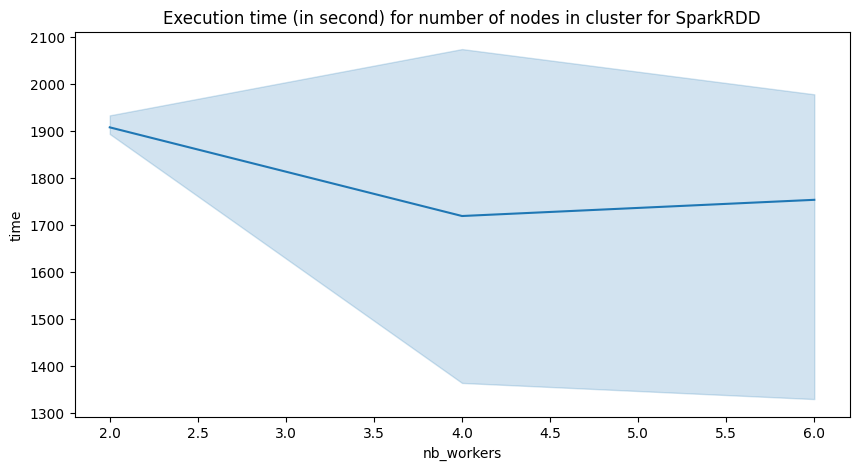

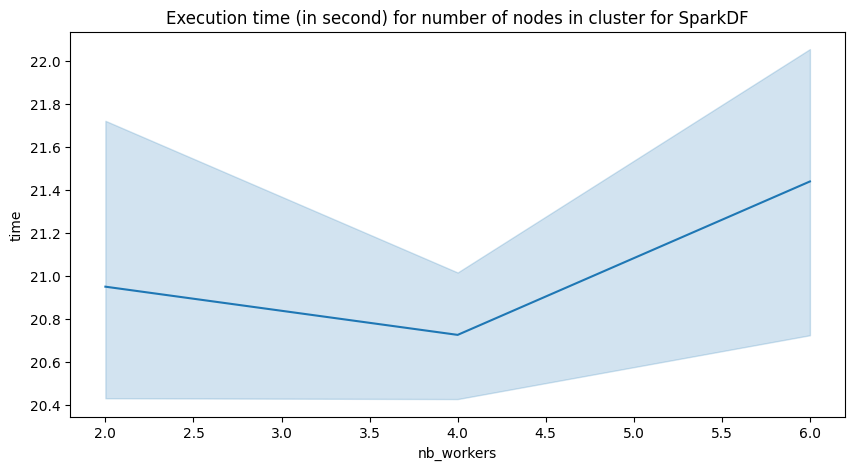

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(data, title):
    data = data[data['size_input_Go']>1]
    data = data[data['iterations']==10]

    plt.figure(figsize=(10,5))
    sns.lineplot(data, x='nb_workers', y='time')
    plt.title(title)


plot(output_results[output_results['type_implemantation']=='rdd'], title="Execution time (in second) for number of nodes in cluster for SparkRDD")
plot(output_results[output_results['type_implemantation']=='df'], title="Execution time (in second) for number of nodes in cluster for SparkDF")

In [22]:
print(first_results.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>urlid</th>
      <th>rank</th>
      <th>size_input_Go</th>
      <th>type_implemantation</th>
      <th>nb_workers</th>
      <th>type_machine</th>
      <th>time</th>
      <th>iterations</th>
    </tr>
    <tr>
      <th>id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>&lt;http://dbpedia.org/resource/Category:Background_asteroids&gt;</td>
      <td>1034.093743</td>
      <td>0.919</td>
      <td>df</td>
      <td>6</td>
      <td>n4-highmem-2</td>
      <td>20.968318</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>&lt;http://dbpedia.org/resource/Category:Background_asteroids&gt;</td>
      <td>1034.093743</td>
      <td>0.919</td>
      <td>rdd</td>
      <td>6</td>
      <td>n4-highmem-2</td>
      <td>1